In [1]:
# install relevant packages (If you need to install belowing packages, please remove comment sign to run belowing codes. )
! pip install -U gensim
! pip install textblob


     |████████████████████████████████| 24.1 MB 2.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy 
from scipy import stats

#Import libraries relevant to natual language processing 
import nltk
import re 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer 
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('wordnet')
from collections import Counter 
from nltk import ngrams 
from gensim.parsing.preprocessing import remove_stopwords 
from nltk.stem import WordNetLemmatizer 
import textblob
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Text Processing for Job descriptions of Data Analyst (DA) Position 

In [3]:
from google.colab import files 
uploaded = files.upload()
df_DA1 = pd.read_csv('CA-Indeed-DA.csv') # read Canada indeed data of Data Analyst Position 
from google.colab import files 
uploaded = files.upload()
df_DA2 = pd.read_csv('US-Indeed-DA.csv') # read US indeed data of Data Analyst Position 
df_DA = pd.concat([df_DA1, df_DA2]) #Concatenate the Canada indeed data and US indeed data for DA position 
df_DA.head()

Saving CA-Indeed-DA.csv to CA-Indeed-DA.csv


Saving US-Indeed-DA.csv to US-Indeed-DA.csv


,Unnamed: 0,search_position,job_location,job_title,company,job_description,job_link
0,0,Data Analyst,Remote,Senior Data Analyst,Lululemon,Who we are\n\nlululemon is an innovative perfo...,https://ca.indeed.com/rc/clk?jk=114b0ec5669ce4...
1,1,Data Analyst,"Remote in St. Catharines, ON",Data Engineer/Analyst,Software International,Our client is an Government Crown Corporation ...,https://ca.indeed.com/rc/clk?jk=baf19780981b62...
2,2,Data Analyst,"Remote in Toronto, ON",Data Analyst,Clio,Clio is more than just a tech company–we are a...,https://ca.indeed.com/rc/clk?jk=e00da8ecc15d26...
3,3,Data Analyst,Remote,Data Analyst,SimWell,SimWell is looking for a data analyst to join ...,https://ca.indeed.com/rc/clk?jk=bd22da331b3f6a...
4,4,Data Analyst,"Remote in Montréal, QC",DATA ANALYST,IMMIJOB,FAITS SAILLANTS DU POSTESociété dans le domain...,https://ca.indeed.com/company/Immijob/jobs/Dat...


In [4]:
DA_JD = df_DA['job_description'] # Extract the job descriptions for DA 
DA_JD = DA_JD.tolist()

In [5]:
# join each component into one component 
DA_s = ' '.join([n for n in DA_JD])

# Only keep letters, remove unnecessary signs&punctuations in the text 
DA_letter_only= re.sub("[^a-zA-Z]", " ", DA_s)

#Conduct the lemmatization on the updated text 
lemmatizer = WordNetLemmatizer()
DA_text_lem = lemmatizer.lemmatize(DA_letter_only)

# Modify the text into all lowercases 
DA_lowercase = DA_text_lem.lower()

In [8]:
from nltk.tokenize import word_tokenize

#Tokenization 
tokenizer = RegexpTokenizer(r'\w+')
DA_text_tokens = tokenizer.tokenize(DA_lowercase)

#Remove the stopwords 
DA_tokens_without_sw = [word for word in DA_text_tokens if not word in stopwords.words("english")]

#Find the most common words shown in the Job descriptions of DA position 
Counter(DA_tokens_without_sw).most_common(100)

[('data', 5768),
 ('experience', 2118),
 ('business', 1904),
 ('work', 1878),
 ('team', 1280),
 ('skills', 1073),
 ('analysis', 1004),
 ('analytics', 880),
 ('support', 814),
 ('analyst', 812),
 ('management', 812),
 ('ability', 798),
 ('information', 762),
 ('working', 706),
 ('required', 694),
 ('time', 675),
 ('job', 669),
 ('requirements', 664),
 ('reporting', 622),
 ('years', 618),
 ('position', 617),
 ('including', 606),
 ('new', 588),
 ('knowledge', 581),
 ('provide', 572),
 ('sql', 560),
 ('company', 543),
 ('development', 542),
 ('health', 539),
 ('tools', 537),
 ('process', 535),
 ('related', 532),
 ('reports', 528),
 ('strong', 527),
 ('solutions', 524),
 ('environment', 514),
 ('technical', 501),
 ('role', 488),
 ('opportunity', 486),
 ('us', 472),
 ('using', 456),
 ('analytical', 452),
 ('research', 445),
 ('employment', 442),
 ('quality', 439),
 ('degree', 438),
 ('product', 436),
 ('systems', 433),
 ('full', 431),
 ('develop', 430),
 ('people', 426),
 ('stakeholders', 42

In [9]:
#Find the most common two-word phrase in the Job descriptions for DA position 
DA_filtered_sentence = remove_stopwords(DA_s)
DA_ngram_counts = Counter(ngrams(DA_filtered_sentence.split(),2))
DA_ngram_counts.most_common(50)

[(('Data', 'Analyst'), 328),
 (('years', 'experience'), 183),
 (('data', 'analysis'), 168),
 (('sexual', 'orientation,'), 133),
 (('national', 'origin,'), 132),
 (('This', 'position'), 128),
 (('equal', 'opportunity'), 122),
 (('1', 'year'), 108),
 (('data', 'analytics'), 107),
 (('data', 'sets'), 103),
 (('data', 'quality'), 98),
 (('communication', 'skills'), 98),
 (('experience', 'data'), 94),
 (('internal', 'external'), 93),
 (('race,', 'color,'), 86),
 (('data', 'visualization'), 85),
 (('data', 'sources'), 83),
 (('team', 'members'), 83),
 (('Experience', 'working'), 82),
 (('Computer', 'Science,'), 79),
 (('We', 'looking'), 76),
 (('Types:', 'Full-time,'), 72),
 (('qualified', 'applicants'), 72),
 (('This', 'role'), 70),
 (('fully', 'vaccinated'), 69),
 (('data', 'collection'), 69),
 (('The', 'Data'), 68),
 (('data', 'management'), 68),
 (('Location:', 'Remote'), 67),
 (('complex', 'data'), 65),
 (('ability', 'work'), 65),
 (('veteran', 'status,'), 65),
 (('We', 'committed'), 63

In [10]:
#Identify the hard skill list 
hard_skill_list = ['python', 'r', 'sql', 'nosql','sas','sap','tableau', 'excel','java','matlab', 'spark', 'hadoop', 'aws','gcp','azure', 'bi','tensorflow']

#Count the frequency of the hard skills 
DA_count_hard_list = [ ]
for i in hard_skill_list:    
    DA_count_hard = DA_tokens_without_sw.count(i)
    DA_count_hard_list.append(DA_tokens_without_sw.count(i))
    print(i,":",DA_count_hard)

python : 253
r : 226
sql : 560
nosql : 7
sas : 81
sap : 24
tableau : 243
excel : 282
java : 15
matlab : 15
spark : 14
hadoop : 13
aws : 64
gcp : 7
azure : 34
bi : 197
tensorflow : 4


In [11]:
#Identify the soft skill list 
soft_skill_list = ['leadership', 'time', 'critical','write', 'team', 'communication','research','presentation','organizational','decision','report','learn','create']

#Count the frequency of the soft skills 
DA_count_soft_list = [ ]
for i in soft_skill_list:    
    
    DA_count_soft = DA_tokens_without_sw.count(i)
    DA_count_soft_list.append(DA_tokens_without_sw.count(i))
    print(i,":",DA_count_soft)

leadership : 119
time : 675
critical : 152
write : 53
team : 1280
communication : 342
research : 445
presentation : 85
organizational : 126
decision : 159
report : 143
learn : 227
create : 311


In [12]:
from textblob import TextBlob
DA_n_grams = TextBlob(DA_filtered_sentence).ngrams(2)
DA_phrase_text = [ ' '.join(grams) for grams in DA_n_grams]

In [13]:
professional_skill_list1 = ['statistics', 'modeling','mathematics','business', 'economics']
professional_skill_list2 = ['deep learning','problem solving','machine learning', 'statistical modeling','data visualization', 'data analysis', 'business intelligence', 'database management', 'data modeling']
professional_skill_list = ['statistics', 'modeling','mathematics','business', 'economics','deep learning','problem solving','machine learning', 'statistical modeling','data visualization', 'data analysis', 'business intelligence', 'database management', 'data modeling']
#Count the frequency of the professional skills 
DA_count_prof_list1 = [ ]
for i in professional_skill_list1:  
    DA_count_prof1 = DA_tokens_without_sw.count(i)
    DA_count_prof_list1.append(DA_tokens_without_sw.count(i))
    print(i,":",DA_count_prof1)

statistics : 204
modeling : 134
mathematics : 113
business : 1904
economics : 88


In [14]:
# DA_n_grams = TextBlob(DA_filtered_sentence).ngrams(2)
# DA_phrase_text = [' '.join(grams) for grams in DA_n_grams]

In [15]:
DA_count_prof_list2 = [ ]
for i in professional_skill_list2:
    DA_count_prof2 = DA_phrase_text.count(i)
    DA_count_prof_list2.append(DA_phrase_text.count(i))
    print(i,":", DA_count_prof2)

deep learning : 0
problem solving : 66
machine learning : 54
statistical modeling : 16
data visualization : 105
data analysis : 230
business intelligence : 71
database management : 25
data modeling : 30


In [16]:
DA_count_prof_list1.extend(DA_count_prof_list2)
DA_count_prof_list1

[204, 134, 113, 1904, 88, 0, 66, 54, 16, 105, 230, 71, 25, 30]

In [17]:
DA_count_prof_list = [ ]
for i in professional_skill_list:
    DA_count_prof = DA_phrase_text.count(i)
    DA_count_prof_list.append(DA_phrase_text.count(i))
    print(i,":", DA_count_prof)

statistics : 0
modeling : 0
mathematics : 0
business : 0
economics : 0
deep learning : 0
problem solving : 66
machine learning : 54
statistical modeling : 16
data visualization : 105
data analysis : 230
business intelligence : 71
database management : 25
data modeling : 30


In [18]:
keywords1 = ['python', 'supervised', 'unsupervised', 'regression', 'knn', 'svm', 'clustering', 'pca', 'nlp', 'modeling', 
             'database', 'sql', 'quantitative', 'exploratory', 'predictive', 'mining', 'presentation', 'optimization', 
             'reasoning', 'dnn', 'group', 'team', 'business', 'communication', 'writing', 'presentation', 'leadership', 
             'management', 'scheduling', 'risk', 'visualization', 'storytelling', 'tableau', 'research', 'forecasting', 
             'cloud', 'r', 'stochastic', 'ethics', 'investment', 'simulation', 'marketing'
           ]

In [19]:
keywords2 = ['machine learning', 'decision tree', 'deep learning', 'database management', 'databse design', 
             'database implementation', 'statistical analysis', 'quantitative analysis', 'problem solving', 'decision making',
             'artificial intelligence', 'pattern recognition', 'neural networks', 'experimental design', 'time series', 
             'reinforcement learning', 'human values', 'information values', 'supply chain'
           ]

In [20]:
DA_count_keyword_list1 = [ ]
for i in keywords1:  
    DA_count_keyword1 = DA_tokens_without_sw.count(i)
    DA_count_keyword_list1.append(DA_count_keyword1)
    print(i,":",DA_count_keyword1)

python : 253
supervised : 1
unsupervised : 2
regression : 28
knn : 0
svm : 0
clustering : 7
pca : 0
nlp : 3
modeling : 134
database : 228
sql : 560
quantitative : 147
exploratory : 16
predictive : 43
mining : 65
presentation : 85
optimization : 59
reasoning : 10
dnn : 0
group : 123
team : 1280
business : 1904
communication : 342
writing : 99
presentation : 85
leadership : 119
management : 812
scheduling : 8
risk : 75
visualization : 222
storytelling : 13
tableau : 243
research : 445
forecasting : 37
cloud : 114
r : 226
stochastic : 0
ethics : 13
investment : 40
simulation : 12
marketing : 206


In [21]:
DA_count_keyword_list2 = [ ]
for i in keywords2:
    DA_count_keyword2 = DA_phrase_text.count(i)
    DA_count_keyword_list2.append(DA_count_keyword2)
    print(i,":", DA_count_keyword2)

machine learning : 54
decision tree : 0
deep learning : 0
database management : 25
databse design : 0
database implementation : 0
statistical analysis : 50
quantitative analysis : 15
problem solving : 66
decision making : 56
artificial intelligence : 11
pattern recognition : 6
neural networks : 0
experimental design : 14
time series : 4
reinforcement learning : 0
human values : 0
information values : 0
supply chain : 23


In [22]:
DA_count_keyword_list1.extend(DA_count_keyword_list2)

## Text Processing for Job descriptions of Data Scientist (DS) Position 

In [23]:
from google.colab import files 
uploaded = files.upload()
df_DS1 = pd.read_csv('CA-Indeed-DS.csv') #read Canada indeed data of Data Scientist Position 
from google.colab import files 
uploaded = files.upload()
df_DS2 = pd.read_csv('US-Indeed-DS.csv') # read US indeed data of Data Scientist Position 
df_DS = pd.concat([df_DS1,df_DS2]) #Concatenate the Canada indeed data and US indeed data for DS position 
df_DS.head()

Saving CA-Indeed-DS.csv to CA-Indeed-DS.csv


Saving US-Indeed-DS.csv to US-Indeed-DS.csv


,Unnamed: 0,Unnamed: 0.1,company,job_description,job_link,job_location,job_title,search_position
0,0,0,Beta-Calco,Beta-Calco is seeking a dynamic Junior Data An...,https://ca.indeed.com/company/Beta--Calco-Inc....,"Remote in Toronto, ON",Junior Data Analyst,Data Scientist
1,1,1,Clearco,Clearco is the world's largest e-commerce inve...,https://ca.indeed.com/rc/clk?jk=35db53fa28c7a5...,"Toronto, ON",Staff Data Scientist,Data Scientist
2,2,2,Index Exchange,About Index Exchange: Index is a global advert...,https://ca.indeed.com/rc/clk?jk=7aed0eb86e6aa3...,"Remote in Toronto, ON",Data Analyst Intern,Data Scientist
3,3,3,BMW Group Canada,A GOOD INTERNSHIP IS NEVER HANDS OFF.\nAn exci...,https://ca.indeed.com/rc/clk?jk=d2d492ab851871...,"Toronto, ON",Data & Analytics Intern (12 Months),Data Scientist
4,4,4,Deeta IT solutions INC,Data modeler with MS SQL Server And SQL Develo...,https://ca.indeed.com/company/Deeta-IT-solutio...,"Toronto, ON",Sr. Data Modeler/Data Analyst,Data Scientist


In [24]:
DS_JD = df_DS['job_description'] #Extract the job descriptions for DS 
DS_JD = DS_JD.tolist()

In [25]:
# join all pieces of job descriptions together into one piece 
DS_s = ' '.join([n for n in DS_JD])

# Only keep letters, remove unnecessary signs&punctuations in the text 
DS_letter_only= re.sub("[^a-zA-Z]", " ", DS_s)

#Conduct the lemmatization on the updated text 
lemmatizer = WordNetLemmatizer()
DS_text_lem = lemmatizer.lemmatize(DS_letter_only)

#Modify the text into all lowercases 
DS_lowercase = DS_text_lem.lower()

In [27]:
#Tokenization 
tokenizer = RegexpTokenizer(r'\w+')
DS_text_tokens = tokenizer.tokenize(DS_lowercase)

#Remove stopwords 
DS_tokens_without_sw = [word for word in DS_text_tokens if not word in stopwords.words("english")]

#Find the most common words shown in the job descriptions of DS position 
#Counter(DS_tokens_without_sw).most_common(100)

In [28]:
Counter(DS_tokens_without_sw).most_common(100)

[('data', 6584),
 ('experience', 2572),
 ('work', 1954),
 ('business', 1787),
 ('team', 1460),
 ('science', 1442),
 ('learning', 1255),
 ('analytics', 1086),
 ('skills', 1028),
 ('analysis', 973),
 ('machine', 907),
 ('working', 822),
 ('models', 754),
 ('product', 735),
 ('years', 732),
 ('ability', 726),
 ('tools', 714),
 ('new', 708),
 ('solutions', 707),
 ('python', 680),
 ('time', 677),
 ('knowledge', 660),
 ('using', 655),
 ('development', 647),
 ('company', 632),
 ('statistical', 622),
 ('including', 616),
 ('insights', 606),
 ('scientist', 596),
 ('engineering', 595),
 ('job', 582),
 ('role', 577),
 ('us', 576),
 ('required', 568),
 ('world', 567),
 ('technical', 560),
 ('information', 554),
 ('support', 553),
 ('develop', 547),
 ('sql', 545),
 ('opportunity', 530),
 ('teams', 521),
 ('strong', 518),
 ('preferred', 504),
 ('design', 502),
 ('statistics', 493),
 ('build', 493),
 ('help', 492),
 ('research', 490),
 ('degree', 490),
 ('people', 489),
 ('environment', 484),
 ('mana

In [29]:
#Find the most common two-word phrase in the job descriptions for DS position 
DS_filtered_sentence = remove_stopwords(DS_s)
DS_ngram_counts = Counter(ngrams(DS_filtered_sentence.split(),2))
DS_ngram_counts.most_common(50)

[(('data', 'science'), 532),
 (('machine', 'learning'), 487),
 (('Data', 'Scientist'), 375),
 (('years', 'experience'), 244),
 (('Data', 'Science'), 243),
 (('sexual', 'orientation,'), 184),
 (('data', 'analysis'), 176),
 (('national', 'origin,'), 165),
 (('equal', 'opportunity'), 161),
 (('Computer', 'Science,'), 153),
 (('data', 'visualization'), 126),
 (('race,', 'color,'), 119),
 (('Machine', 'Learning'), 116),
 (('experience', 'working'), 112),
 (('data', 'sets'), 108),
 (('communication', 'skills'), 104),
 (('machine', 'learning,'), 102),
 (('Experience', 'working'), 98),
 (('qualified', 'applicants'), 97),
 (('The', 'Data'), 96),
 (('experience', 'data'), 95),
 (('orientation,', 'gender'), 95),
 (('gender', 'identity,'), 93),
 (('data', 'analytics'), 93),
 (('data', 'sources'), 92),
 (('team', 'members'), 91),
 (('regard', 'race,'), 89),
 (('veteran', 'status,'), 88),
 (('color,', 'religion,'), 86),
 (('We', 'looking'), 83),
 (('business', 'problems'), 81),
 (('1', 'year'), 80),

In [30]:
#Identify the frequency of hard skills 
DS_count_hard_list = [ ]
for i in hard_skill_list:    
    DS_count_hard = DS_tokens_without_sw.count(i)
    DS_count_hard_list.append(DS_tokens_without_sw.count(i))
    print(i,":",DS_count_hard)

python : 680
r : 459
sql : 545
nosql : 26
sas : 95
sap : 41
tableau : 165
excel : 78
java : 79
matlab : 37
spark : 125
hadoop : 102
aws : 125
gcp : 39
azure : 113
bi : 152
tensorflow : 60


In [31]:
# Identify the frequency of soft skills 
DS_count_soft_list = [ ]
for i in soft_skill_list:    
    DS_count_soft = DS_tokens_without_sw.count(i)
    DS_count_soft_list.append(DS_tokens_without_sw.count(i))
    print(i,":",DS_count_soft)

leadership : 184
time : 677
critical : 121
write : 64
team : 1460
communication : 356
research : 490
presentation : 81
organizational : 66
decision : 249
report : 41
learn : 322
create : 337


In [32]:
# Identify the frequency of professional skills 
DS_count_prof_list1 = [ ]
for i in professional_skill_list1:    
    DS_count_prof1 = DS_tokens_without_sw.count(i)
    DS_count_prof_list1.append(DS_tokens_without_sw.count(i))
    print(i,":",DS_count_prof1)

statistics : 493
modeling : 393
mathematics : 218
business : 1787
economics : 118


In [33]:
DS_n_grams = TextBlob(DS_filtered_sentence).ngrams(2)
DS_phrase_text = [ ' '.join(grams) for grams in DS_n_grams]


In [34]:
DS_count_prof_list2 = [ ]
for i in professional_skill_list2:  
    DS_count_prof2 = DS_phrase_text.count(i)
    DS_count_prof_list2.append(DS_phrase_text.count(i))
    print(i, ":", DS_count_prof2)

deep learning : 75
problem solving : 48
machine learning : 625
statistical modeling : 59
data visualization : 147
data analysis : 233
business intelligence : 43
database management : 19
data modeling : 32


In [35]:
DS_count_prof_list1.extend(DS_count_prof_list2)

In [36]:
DS_count_keyword_list1 = [ ]
for i in keywords1:  
    DS_count_keyword1 = DS_tokens_without_sw.count(i)
    DS_count_keyword_list1.append(DS_count_keyword1)
    print(i,":",DS_count_keyword1)

python : 680
supervised : 45
unsupervised : 46
regression : 135
knn : 4
svm : 17
clustering : 86
pca : 0
nlp : 75
modeling : 393
database : 119
sql : 545
quantitative : 252
exploratory : 66
predictive : 308
mining : 209
presentation : 81
optimization : 156
reasoning : 7
dnn : 1
group : 113
team : 1460
business : 1787
communication : 356
writing : 89
presentation : 81
leadership : 184
management : 481
scheduling : 14
risk : 122
visualization : 288
storytelling : 31
tableau : 165
research : 490
forecasting : 94
cloud : 236
r : 459
stochastic : 3
ethics : 8
investment : 64
simulation : 42
marketing : 203


In [37]:
DS_count_keyword_list2 = [ ]
for i in keywords2:
    DS_count_keyword2 = DS_phrase_text.count(i)
    DS_count_keyword_list2.append(DS_count_keyword2)
    print(i,":", DS_count_keyword2)

machine learning : 625
decision tree : 15
deep learning : 75
database management : 19
databse design : 0
database implementation : 0
statistical analysis : 111
quantitative analysis : 22
problem solving : 48
decision making : 66
artificial intelligence : 29
pattern recognition : 12
neural networks : 57
experimental design : 24
time series : 38
reinforcement learning : 10
human values : 0
information values : 0
supply chain : 32


In [38]:
DS_count_keyword_list1.extend(DS_count_keyword_list2)

## Text Processing for Job descriptions of Data Manager (DM) Position 

In [39]:
from google.colab import files 
uploaded = files.upload()
df_DM1 = pd.read_csv('CA-Indeed-DM.csv') #Read Canada indeed data of Data Manager Position 
from google.colab import files 
uploaded = files.upload()
df_DM2 = pd.read_csv('US-Indeed-DM.csv') #Read US indeed data of Data Manager position 
df_DM = pd.concat([df_DM1,df_DM2]) #Concatenate the Canada indeed data and US indeed data for DM position 
df_DM.head()

Saving CA-Indeed-DM.csv to CA-Indeed-DM.csv


Saving US-Indeed-DM.csv to US-Indeed-DM.csv


,Unnamed: 0,company,job_description,job_link,job_location,job_title,search_position,Unnamed: 0.1
0,0,Mercedes-Benz Canada,"Manager, Data House\n\nGroup: Mercedes-Benz Gr...",https://ca.indeed.com/rc/clk?jk=cca9919ac6930a...,"Mississauga, ON","Manager, Data House",Data Manager,NaN
1,1,Johnson & Johnson Family of Companies,"Caring for the world, one person at a time has...",https://ca.indeed.com/rc/clk?jk=f6d8b6f76f952e...,"Toronto, ON",Manager of Data Science and Analytics,Data Manager,NaN
2,2,Instacart,We're transforming the grocery industry\n\nAt ...,https://ca.indeed.com/rc/clk?jk=1b63f4c4c050e1...,"Hybrid remote in Toronto, ON","Manager, Data Science - Logistics & Shopper Pay",Data Manager,NaN
3,3,Clio,Clio is more than just a tech company–we are a...,https://ca.indeed.com/rc/clk?jk=01c4f16d435cbb...,"Remote in Toronto, ON",Manager of Data Analytics,Data Manager,NaN
4,4,CBI International,"The Role:\n\nAt CB Insights, we're on a missio...",https://ca.indeed.com/rc/clk?jk=ef6989fff0f79d...,"Remote in Toronto, ON","Product Manager, Data Pipelines",Data Manager,NaN


In [40]:
# Extract the job descriptions for DM
DM_JD = df_DM['job_description']
DM_JD = DM_JD.tolist()

In [41]:
# join all pieces of job descriptions together into one piece 
DM_s = ' '.join([n for n in DM_JD])

# Only keep letters, remove unnecessary signs & punctuations in the text 
DM_letter_only= re.sub("[^a-zA-Z]", " ", DM_s)

#Conduct the lematization on the updated text 
lemmatizer = WordNetLemmatizer()
DM_text_lem = lemmatizer.lemmatize(DM_letter_only)

#Modify the text into all lowercases 
DM_lowercase = DM_text_lem.lower()

In [43]:
# Tokenization 
tokenizer = RegexpTokenizer(r'\w+')
DM_text_tokens = tokenizer.tokenize(DM_lowercase)

#Remove the stopwords 
DM_tokens_without_sw = [word for word in DM_text_tokens if not word in stopwords.words("english")]

#Find the most common words shown in the job descriptions for DM position 
#Counter(DM_tokens_without_sw).most_common(100)

In [44]:
# Find the most common two-word phrase in the job descriptions for DM position 
DM_filtered_sentence = remove_stopwords(DM_s)
#DM_ngram_counts = Counter(ngrams(DM_filtered_sentence.split(),2))
#DM_ngram_counts.most_common(50)

In [45]:
# Count the frequency of the hard skills 
DM_count_hard_list= [ ]
for i in hard_skill_list:    
    DM_count_hard = DM_tokens_without_sw.count(i)
    DM_count_hard_list.append(DM_tokens_without_sw.count(i))
    print(i,":",DM_count_hard)

python : 135
r : 128
sql : 242
nosql : 9
sas : 52
sap : 21
tableau : 138
excel : 131
java : 20
matlab : 11
spark : 39
hadoop : 24
aws : 58
gcp : 31
azure : 64
bi : 133
tensorflow : 2


In [46]:
# Count the frequency of the soft skills 
DM_count_soft_list = [ ]
for i in soft_skill_list:    
    DM_count_soft = DM_tokens_without_sw.count(i)
    DM_count_soft_list.append(DM_tokens_without_sw.count(i))
    print(i,":",DM_count_soft)

leadership : 384
time : 666
critical : 156
write : 34
team : 2200
communication : 459
research : 321
presentation : 80
organizational : 153
decision : 220
report : 113
learn : 247
create : 397


In [47]:
# Count the frequency of the professional skills 
DM_count_prof_list1 = [ ]
for i in professional_skill_list1:    
    DM_count_prof1 = DM_tokens_without_sw.count(i)
    DM_count_prof_list1.append(DM_tokens_without_sw.count(i))
    print(i,":",DM_count_prof1)

statistics : 99
modeling : 96
mathematics : 48
business : 2043
economics : 47


In [48]:
DM_n_grams = TextBlob(DM_filtered_sentence).ngrams(2)
DM_phrase_text = [ ' '.join(grams) for grams in DM_n_grams]

In [49]:
# Count the frequency of the professional skills 
DM_count_prof_list2 = [ ]
for i in professional_skill_list2:
    DM_count_prof2 = DM_phrase_text.count(i)
    DM_count_prof_list2.append(DM_phrase_text.count(i))
    print(i,":", DM_count_prof2)

deep learning : 2
problem solving : 73
machine learning : 71
statistical modeling : 4
data visualization : 64
data analysis : 107
business intelligence : 63
database management : 13
data modeling : 29


In [50]:
DM_count_prof_list1.extend(DM_count_prof_list2)

In [51]:
DM_count_keyword_list1 = [ ]
for i in keywords1:  
    DM_count_keyword1 = DM_tokens_without_sw.count(i)
    DM_count_keyword_list1.append(DM_count_keyword1)
    print(i,":",DM_count_keyword1)

python : 135
supervised : 3
unsupervised : 3
regression : 10
knn : 0
svm : 0
clustering : 5
pca : 0
nlp : 9
modeling : 96
database : 159
sql : 242
quantitative : 115
exploratory : 5
predictive : 42
mining : 42
presentation : 80
optimization : 61
reasoning : 3
dnn : 0
group : 207
team : 2200
business : 2043
communication : 459
writing : 77
presentation : 80
leadership : 384
management : 1606
scheduling : 44
risk : 261
visualization : 132
storytelling : 29
tableau : 138
research : 321
forecasting : 24
cloud : 184
r : 128
stochastic : 0
ethics : 28
investment : 85
simulation : 1
marketing : 355


In [52]:
DM_count_keyword_list2 = [ ]
for i in keywords2:
    DM_count_keyword2 = DM_phrase_text.count(i)
    DM_count_keyword_list2.append(DM_count_keyword2)
    print(i,":", DM_count_keyword2)

machine learning : 71
decision tree : 0
deep learning : 2
database management : 13
databse design : 0
database implementation : 0
statistical analysis : 18
quantitative analysis : 16
problem solving : 73
decision making : 84
artificial intelligence : 11
pattern recognition : 1
neural networks : 0
experimental design : 4
time series : 6
reinforcement learning : 2
human values : 0
information values : 0
supply chain : 22


In [53]:
DM_count_keyword_list1.extend(DM_count_keyword_list2)

## Text Processing for Job descriptions of Data Engineer (DE) Position 

In [54]:
from google.colab import files 
uploaded = files.upload()
df_DE1 = pd.read_csv('CA-Indeed-DE.csv') #Read Canada indeed data of Data Engineer Position 
from google.colab import files 
uploaded = files.upload()
df_DE2 = pd.read_csv('US-Indeed-DE.csv') #Read US indeed data of Data Engineer Position 
df_DE = pd.concat([df_DE1,df_DE2]) # Concatenate the Canada indeed data and US indeed data for DE position 
df_DE.head()

Saving CA-Indeed-DE.csv to CA-Indeed-DE.csv


Saving US-Indeed-DE.csv to US-Indeed-DE.csv


,Unnamed: 0,company,job_description,job_link,job_location,job_title,search_position
0,0,FreshBooks,"It turns out… unicorns are real! In fact, Fres...",https://ca.indeed.com/company/FreshBooks/jobs/...,"Remote in Toronto, ON",Analytics Engineer,Data Engineer
1,1,Forma.ai,Do you want to have an impact on a $1T industr...,https://ca.indeed.com/rc/clk?jk=c57ce3b7b9f454...,"Toronto, ON",Analytics Engineer,Data Engineer
2,2,RBC,What is the opportunity?\nAs a BI Platform Eng...,https://ca.indeed.com/rc/clk?jk=fecc12d4ba520b...,"Toronto, ON",BI Platform Engineer,Data Engineer
3,3,York University,"Purpose:\nAccountable to the Manager, Operatio...",https://ca.indeed.com/rc/clk?jk=6e992ad6ea9302...,"Toronto, ON",Business Analyst & Process Engineer,Data Engineer
4,4,Rewind,Analytics Engineer (Remote within Canada)*Abou...,https://ca.indeed.com/company/Rewind/jobs/Anal...,"Remote in Ottawa, ON",Analytics Engineer (Remote within Canada),Data Engineer


In [55]:
DE_JD = df_DE['job_description'] #Extract the job description for DE
DE_JD = DE_JD.tolist()

In [56]:
# join all pieces of job descriptions together into one piece 
DE_s = ' '.join([n for n in DE_JD])

#Only keep letters, remove unnecssary signs&punctuations in the text 
DE_letter_only= re.sub("[^a-zA-Z]", " ", DE_s)

# Conduct the lemmatization on the updated text  
lemmatizer = WordNetLemmatizer()
DE_text_lem = lemmatizer.lemmatize(DE_letter_only)

#Modify the text into all lowercases 
DE_lowercase = DE_text_lem.lower()

In [57]:
#Tokenization 
tokenizer = RegexpTokenizer(r'\w+')
DE_text_tokens = tokenizer.tokenize(DE_lowercase)

#Remove the stopwords 
DE_tokens_without_sw = [word for word in DE_text_tokens if not word in stopwords.words("english")]

# Find the most common words shown in the job descriptions for DE position 
#Counter(DE_tokens_without_sw).most_common(100)

In [58]:
#Find the most common two-word phrase in the job descriptions for DE position 
DE_filtered_sentence = remove_stopwords(DE_s)
#DE_ngram_counts = Counter(ngrams(DE_filtered_sentence.split(),2))
#DE_ngram_counts.most_common(50)

In [59]:
#Identify the frequency of hard skills 
DE_count_hard_list = [ ] #Create the list to store the frequencies of each coding skill
for i in hard_skill_list:    
    DE_count_hard = DE_tokens_without_sw.count(i)
    DE_count_hard_list.append(DE_tokens_without_sw.count(i))
    print(i,":",DE_count_hard)

python : 376
r : 175
sql : 462
nosql : 42
sas : 32
sap : 98
tableau : 233
excel : 189
java : 59
matlab : 0
spark : 133
hadoop : 57
aws : 209
gcp : 36
azure : 208
bi : 196
tensorflow : 1


In [60]:
#identify the frequency of soft skills 
DE_count_soft_list = [ ]
for i in soft_skill_list:    
    DE_count_soft = DE_tokens_without_sw.count(i)
    DE_count_soft_list.append(DE_tokens_without_sw.count(i))
    print(i,":",DE_count_soft)

leadership : 147
time : 831
critical : 227
write : 66
team : 1472
communication : 353
research : 171
presentation : 54
organizational : 120
decision : 131
report : 27
learn : 447
create : 311


In [61]:
#identify the frequency of professional skills 
DE_count_prof_list1 = [ ]
for i in professional_skill_list1:    
    DE_count_prof1 = DE_tokens_without_sw.count(i)
    DE_count_prof_list1.append(DE_tokens_without_sw.count(i))
    print(i,":",DE_count_prof1)

statistics : 172
modeling : 200
mathematics : 21
business : 1725
economics : 99


In [62]:
DE_n_grams = TextBlob(DE_filtered_sentence).ngrams(2)
DE_phrase_text = [ ' '.join(grams) for grams in DE_n_grams]

In [63]:
DE_count_prof_list2 = [ ]
for i in professional_skill_list2:
    DE_count_prof2 = DE_phrase_text.count(i)
    DE_count_prof_list2.append(DE_phrase_text.count(i))
    print(i,":", DE_count_prof2)

deep learning : 1
problem solving : 44
machine learning : 73
statistical modeling : 3
data visualization : 37
data analysis : 67
business intelligence : 117
database management : 4
data modeling : 54


In [64]:
DE_count_prof_list1.extend(DE_count_prof_list2)

In [65]:
DE_count_keyword_list1 = [ ]
for i in keywords1:  
    DE_count_keyword1 = DE_tokens_without_sw.count(i)
    DE_count_keyword_list1.append(DE_count_keyword1)
    print(i,":",DE_count_keyword1)

python : 376
supervised : 3
unsupervised : 3
regression : 3
knn : 4
svm : 2
clustering : 0
pca : 0
nlp : 5
modeling : 200
database : 190
sql : 462
quantitative : 206
exploratory : 2
predictive : 42
mining : 10
presentation : 54
optimization : 135
reasoning : 7
dnn : 0
group : 172
team : 1472
business : 1725
communication : 353
writing : 46
presentation : 54
leadership : 147
management : 1107
scheduling : 9
risk : 164
visualization : 102
storytelling : 19
tableau : 233
research : 171
forecasting : 59
cloud : 332
r : 175
stochastic : 0
ethics : 3
investment : 52
simulation : 25
marketing : 57


In [66]:
DE_count_keyword_list2 = [ ]
for i in keywords2:
    DE_count_keyword2 = DE_phrase_text.count(i)
    DE_count_keyword_list2.append(DE_count_keyword2)
    print(i,":", DE_count_keyword2)

machine learning : 73
decision tree : 0
deep learning : 1
database management : 4
databse design : 0
database implementation : 0
statistical analysis : 4
quantitative analysis : 0
problem solving : 44
decision making : 30
artificial intelligence : 22
pattern recognition : 0
neural networks : 0
experimental design : 1
time series : 2
reinforcement learning : 1
human values : 0
information values : 0
supply chain : 108


In [67]:
DE_count_keyword_list1.extend(DE_count_keyword_list2)

## Exploratory data analysis 

In [68]:
#Create the dictionary of the frequencies of selected coding & software skills for each position 
dict1 = {'Coding skills': hard_skill_list, 'DA Frequencies': DA_count_hard_list, 'DS Frequencies': DS_count_hard_list, 
       'DM Frequencies': DM_count_hard_list, 'DE Frequencies': DE_count_hard_list}

df_coding = pd.DataFrame(dict1)

In [69]:
df_coding

,Coding skills,DA Frequencies,DS Frequencies,DM Frequencies,DE Frequencies
0,python,253,680,135,376
1,r,226,459,128,175
2,sql,560,545,242,462
3,nosql,7,26,9,42
4,sas,81,95,52,32
5,sap,24,41,21,98
6,tableau,243,165,138,233
7,excel,282,78,131,189
8,java,15,79,20,59
9,matlab,15,37,11,0


In [70]:
len(hard_skill_list)

17

In [71]:
df_coding['Sum'] = df_coding.sum(axis = 1)
df_coding.sort_values(by = 'Sum', axis = 0, ascending = False, inplace = True)

df_coding

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Coding skills,DA Frequencies,DS Frequencies,DM Frequencies,DE Frequencies,Sum
2,sql,560,545,242,462,1809
0,python,253,680,135,376,1444
1,r,226,459,128,175,988
6,tableau,243,165,138,233,779
7,excel,282,78,131,189,680
15,bi,197,152,133,196,678
12,aws,64,125,58,209,456
14,azure,34,113,64,208,419
10,spark,14,125,39,133,311
4,sas,81,95,52,32,260


In [72]:
# Drop tensorflow since there are only a few values 
df_coding.drop([13,3,16,9],axis = 0, inplace = True)

In [73]:
df_coding['Percentage (%)'] = round(df_coding['Sum']/df_coding['Sum'].sum()*100,2)
df_coding

,Coding skills,DA Frequencies,DS Frequencies,DM Frequencies,DE Frequencies,Sum,Percentage (%)
2,sql,560,545,242,462,1809,21.59
0,python,253,680,135,376,1444,17.24
1,r,226,459,128,175,988,11.79
6,tableau,243,165,138,233,779,9.30
7,excel,282,78,131,189,680,8.12
15,bi,197,152,133,196,678,8.09
12,aws,64,125,58,209,456,5.44
14,azure,34,113,64,208,419,5.00
10,spark,14,125,39,133,311,3.71
4,sas,81,95,52,32,260,3.10


Text(0.5, 1.0, 'Figure 1: The Plot of Frequencies of Coding & Software Skills For Each Position')

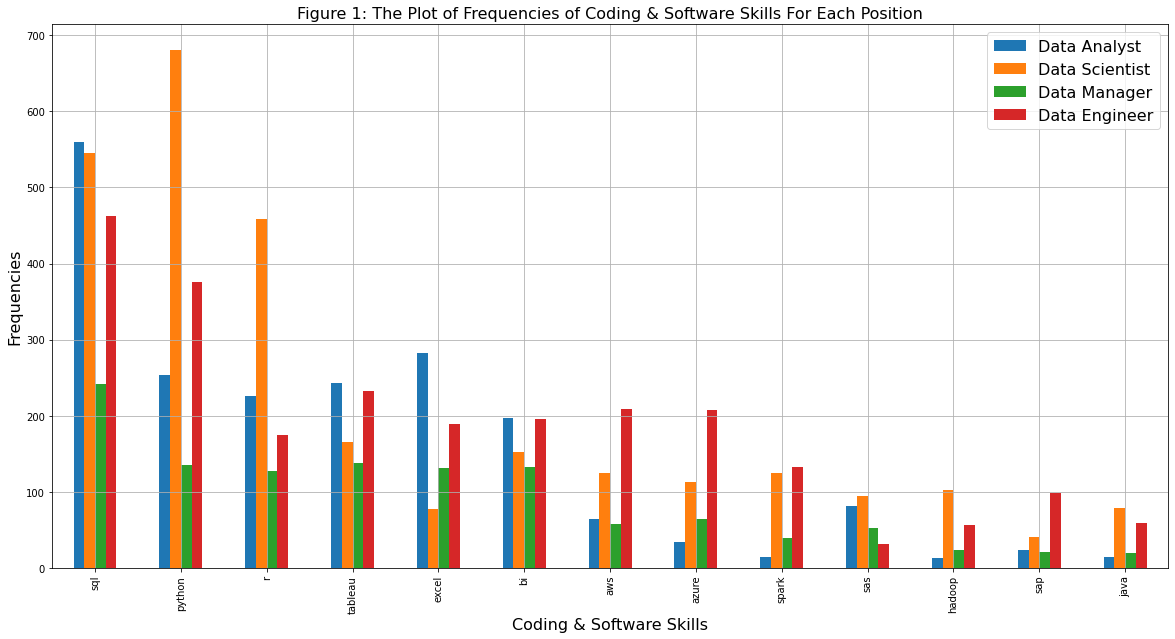

In [74]:
# Plot the feature importance of coding skills for DA, DS, DM, DE position 
#fig, ax = plt.subplots(figsize = (15,6))

df_coding.plot(x = 'Coding skills', y = ['DA Frequencies', 'DS Frequencies', 'DM Frequencies', 'DE Frequencies'], kind = 'bar', figsize = (20,10))
plt.grid()
plt.ylabel('Frequencies', fontsize = 16)
plt.xlabel('Coding & Software Skills', fontsize = 16)
plt.legend(['Data Analyst', 'Data Scientist', 'Data Manager','Data Engineer'],fontsize = 16)
plt.title('Figure 1: The Plot of Frequencies of Coding & Software Skills For Each Position', fontsize = 16)

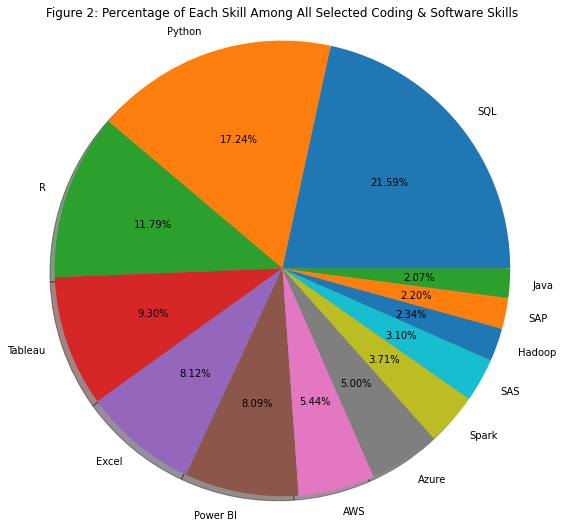

In [75]:
# Draw the pie chart 
labels_coding = ['SQL', 'Python', 'R', 'Tableau', 'Excel', 'Power BI', 'AWS', 'Azure', 'Spark', 'SAS', 'Hadoop', 'SAP', 'Java']
data_coding = [21.59,17.24,11.79,9.30,8.12,8.09,5.44,5.00,3.71,3.10,2.34,2.20,2.07]

fig, ax = plt.subplots(figsize = (9,9))

ax.pie(data_coding, labels = labels_coding, autopct='%1.2f%%', shadow = True)
ax.axis('equal')
plt.title('Figure 2: Percentage of Each Skill Among All Selected Coding & Software Skills')
plt.show()

In [76]:
#Create the dictionary of the frequencies of selected soft skills for each position 
dict2 = {'Soft skills': soft_skill_list, 'DA Frequencies': DA_count_soft_list, 'DS Frequencies': DS_count_soft_list, 
       'DM Frequencies': DM_count_soft_list, 'DE Frequencies': DE_count_soft_list}

df_soft = pd.DataFrame(dict2)


In [77]:
df_soft['Sum'] = df_soft.sum(axis = 1)
df_soft.sort_values(by = 'Sum', axis = 0, ascending = False, inplace = True)

df_soft

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Soft skills,DA Frequencies,DS Frequencies,DM Frequencies,DE Frequencies,Sum
4,team,1280,1460,2200,1472,6412
1,time,675,677,666,831,2849
5,communication,342,356,459,353,1510
6,research,445,490,321,171,1427
12,create,311,337,397,311,1356
11,learn,227,322,247,447,1243
0,leadership,119,184,384,147,834
9,decision,159,249,220,131,759
2,critical,152,121,156,227,656
8,organizational,126,66,153,120,465


Text(0.5, 1.0, 'Figure 3: The Plot of Frequencies of Soft Skills For Each Position')

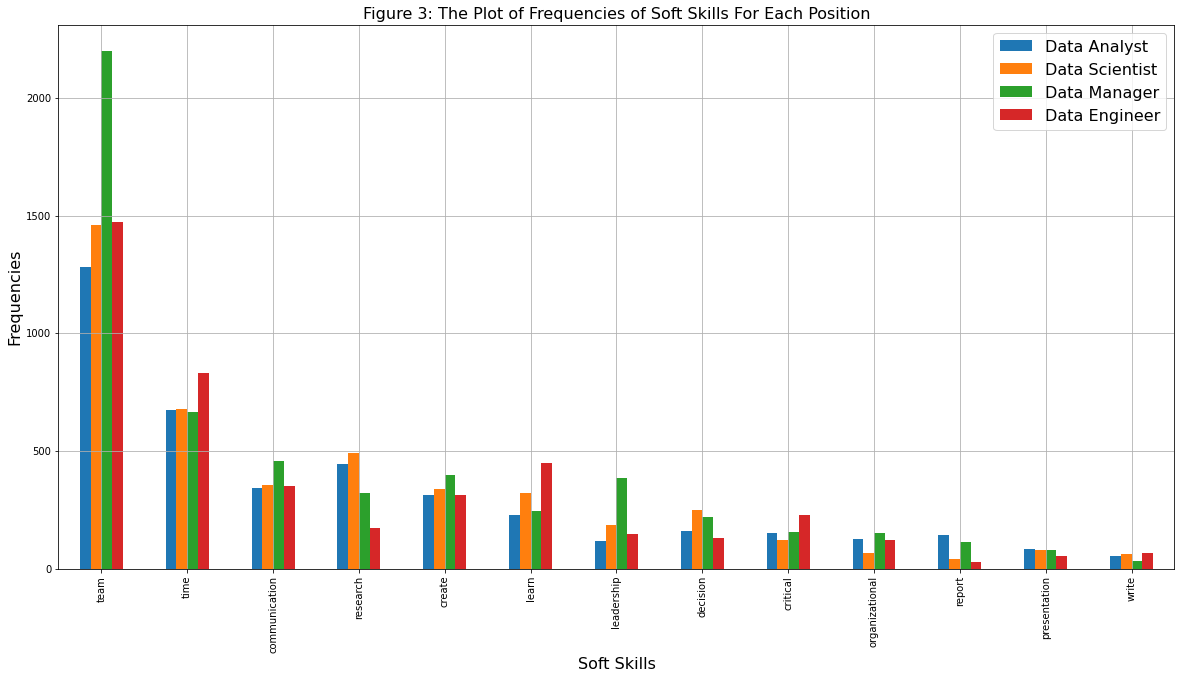

In [78]:
df_soft.plot(x = 'Soft skills', y = ['DA Frequencies', 'DS Frequencies', 'DM Frequencies', 'DE Frequencies'], kind = 'bar', figsize = (20,10))
plt.grid()
plt.ylabel('Frequencies', fontsize = 16)
plt.xlabel('Soft Skills', fontsize = 16)
plt.legend(['Data Analyst', 'Data Scientist', 'Data Manager','Data Engineer'],fontsize = 16)
plt.title('Figure 3: The Plot of Frequencies of Soft Skills For Each Position', fontsize = 16)

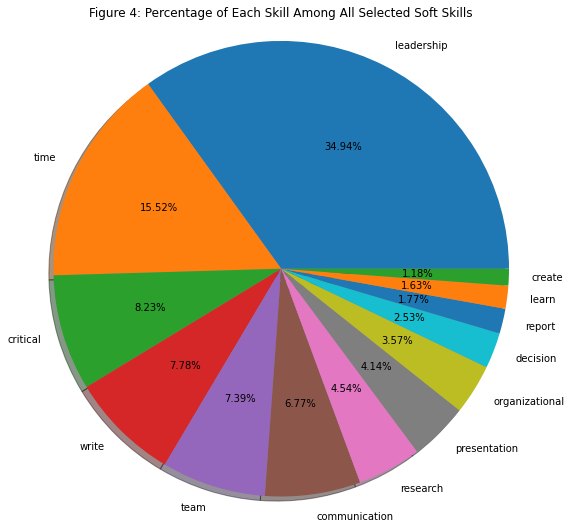

In [79]:
# Draw the pie chart 
labels_soft = ['leadership', 'time', 'critical','write', 'team', 'communication','research','presentation','organizational','decision','report','learn','create']

data_soft = [6412, 2849, 1510, 1427, 1356, 1243, 834, 759, 656, 465, 324, 300, 217]

fig, ax = plt.subplots(figsize = (9,9))

ax.pie(data_soft, labels = labels_soft, autopct='%1.2f%%', shadow = True)
ax.axis('equal')
plt.title('Figure 4: Percentage of Each Skill Among All Selected Soft Skills')
plt.show()

In [80]:
#Create the dictionary of the frequencies of selected soft skills for each position 
dict3 = {'Professional skills': professional_skill_list, 'DA Frequencies': DA_count_prof_list1, 'DS Frequencies': DS_count_prof_list1, 
       'DM Frequencies': DM_count_prof_list1, 'DE Frequencies': DE_count_prof_list1}

df_profession = pd.DataFrame(dict3)

In [81]:
df_profession['Sum'] = df_profession.sum(axis = 1)
df_profession.sort_values(by = 'Sum', axis = 0, ascending = False, inplace = True)

df_profession

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Professional skills,DA Frequencies,DS Frequencies,DM Frequencies,DE Frequencies,Sum
3,business,1904,1787,2043,1725,7459
0,statistics,204,493,99,172,968
1,modeling,134,393,96,200,823
7,machine learning,54,625,71,73,823
10,data analysis,230,233,107,67,637
2,mathematics,113,218,48,21,400
9,data visualization,105,147,64,37,353
4,economics,88,118,47,99,352
11,business intelligence,71,43,63,117,294
6,problem solving,66,48,73,44,231


Text(0.5, 1.0, 'Figure 5 : The Plot of Frequencies of Professional Skills For Each Position')

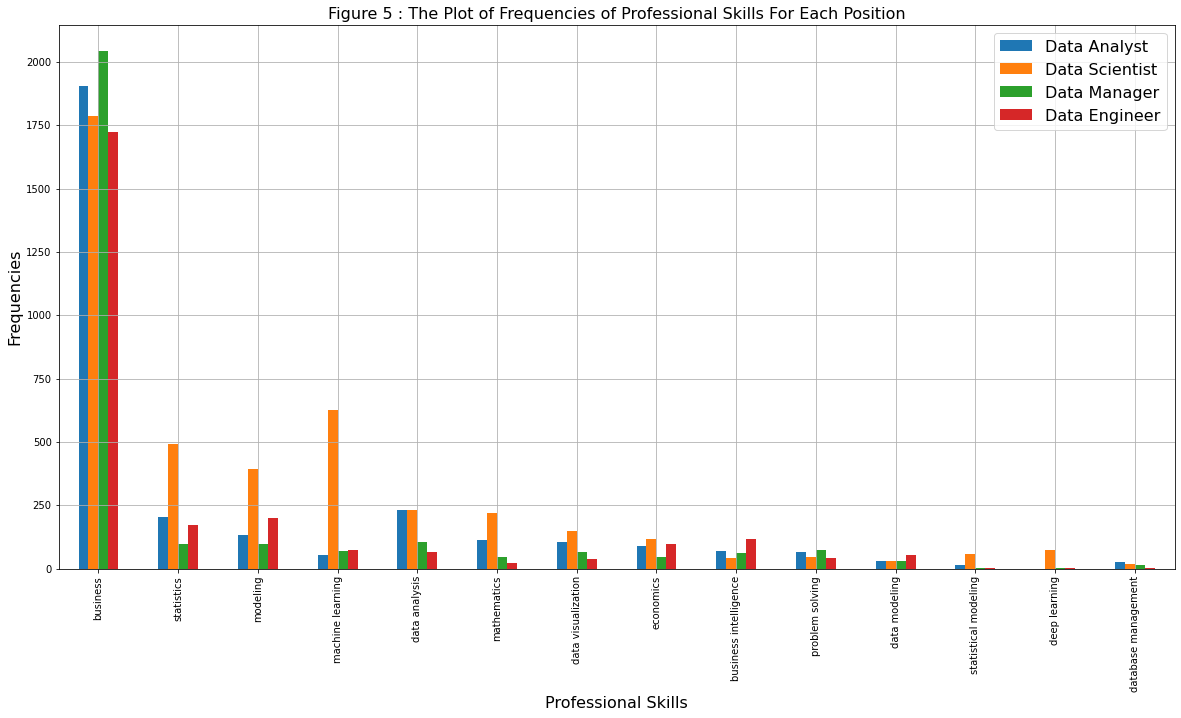

In [82]:
df_profession.plot(x = 'Professional skills', y = ['DA Frequencies', 'DS Frequencies', 'DM Frequencies', 'DE Frequencies'], kind = 'bar', figsize = (20,10))
plt.grid()
plt.ylabel('Frequencies', fontsize = 16)
plt.xlabel('Professional Skills', fontsize = 16)
plt.legend(['Data Analyst', 'Data Scientist', 'Data Manager','Data Engineer'],fontsize = 16)
plt.title('Figure 5 : The Plot of Frequencies of Professional Skills For Each Position', fontsize = 16)

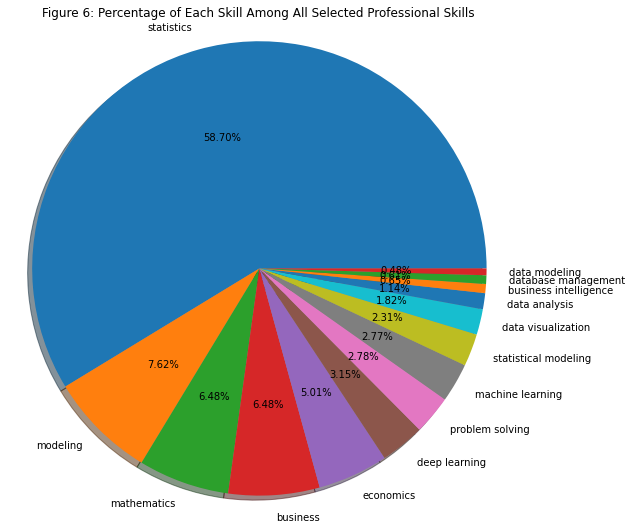

In [83]:
# Draw the pie chart 

labels_prof = professional_skill_list = ['statistics', 'modeling','mathematics','business', 'economics',
                                         'deep learning','problem solving','machine learning', 'statistical modeling',
                                         'data visualization', 'data analysis', 'business intelligence', 
                                         'database management', 'data modeling']

data_prof = [7459, 968, 823, 823, 637, 400, 353, 352, 294, 231, 145, 82, 78, 61]

fig, ax = plt.subplots(figsize = (9,9))

ax.pie(data_prof, labels = labels_prof, autopct='%1.2f%%', shadow = True)
ax.axis('equal')
plt.title('Figure 6: Percentage of Each Skill Among All Selected Professional Skills')
plt.show()

In [84]:
# Core Course:
# Summer 入学
# Pre-requiste Course: #Course1: Introduction to statistics and mathematics for data science 
                       #Course2: Introduction to programming for data science 
# Technical - oriented courses:#Course1: Machine learning with applications in python 
                    #Course2: Big data analytics and visualization
                    #Course3: Data Modeling and Database Management(SQL)
                    #Course4: Data Mining and Decision analytics (technical - oriented)
                    # 
# Business - oriented courses: # Course1: Business Leadership and Communication (Business cases combining with analytics)
                    # Course2: Data Mining for Business applications (business - oriented)
                    # Course3: Business problem analysis and management 
        

# Optional courses: 
# Tehnical - oriented courses: 

# Business - oriented courses 

In [85]:
keywords = keywords1 + keywords2

In [86]:
dict_keyword = {'DA Frequencies': DA_count_keyword_list1, 'DS Frequencies': DS_count_keyword_list1, 
       'DM Frequencies': DM_count_keyword_list1, 'DE Frequencies': DE_count_keyword_list1}

df_course_keyword = pd.DataFrame(index = keywords, data = dict_keyword)

In [87]:
df_course_keyword

,DA Frequencies,DS Frequencies,DM Frequencies,DE Frequencies
python,253,680,135,376
supervised,1,45,3,3
unsupervised,2,46,3,3
regression,28,135,10,3
knn,0,4,0,4
...,...,...,...,...
time series,4,38,6,2
reinforcement learning,0,10,2,1
human values,0,0,0,0
information values,0,0,0,0


In [88]:
df_course_keyword_ratio = df_course_keyword.apply(lambda x: x / x.sum(), axis=0)

In [89]:
df_course_keyword_ratio.sort_values(by = 'DA Frequencies', ascending = False).head(50)

,DA Frequencies,DS Frequencies,DM Frequencies,DE Frequencies
business,0.227126,0.159868,0.201897,0.203636
team,0.152690,0.130614,0.217413,0.173769
management,0.096863,0.043031,0.158711,0.130681
sql,0.066802,0.048756,0.023915,0.054539
research,0.053084,0.043836,0.031723,0.020187
communication,0.040797,0.031848,0.045360,0.041672
python,0.030180,0.060834,0.013341,0.044387
tableau,0.028987,0.014761,0.013638,0.027506
database,0.027198,0.010646,0.015713,0.022429
r,0.026959,0.041063,0.012649,0.020659
